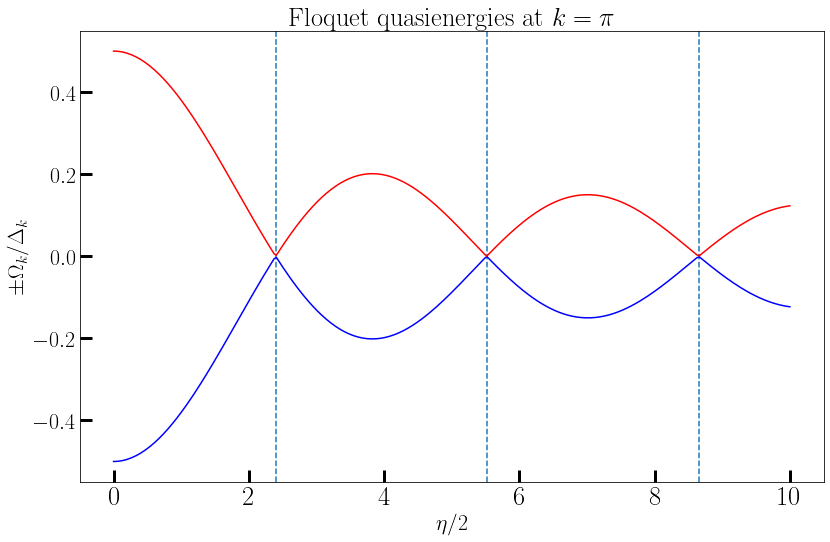

In [26]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.special import jn_zeros

k = np.pi 

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)

delta = np.cos(k); eps0  = np.sin(k)

omega = 1.0 * 2 * np.pi; A_vec = np.linspace(0, 10, 300) * omega;

T = (2 * np.pi)/omega

tlist  = np.linspace(0.0, 10 * T, 101)

psi0   = basis(2,0)

q_energies = np.zeros((len(A_vec), 2))

H0 = delta/2.0 * sigmaz() - eps0/2.0 * sigmax()

args = {'w':omega}

for idx, A in enumerate(A_vec):
    H1 = A/2.0 * sigmax()
    H = [H0, [H1, lambda t, args: np.cos(args['w'] * t)]]
    f_modes, f_energies = floquet_modes(H, T, args, True)
    q_energies[idx,:] = f_energies


plt.figure(figsize=(12,8))

for eta in jn_zeros(0,3):
    plt.axvline(x=eta, linestyle= '--')

plt.plot(A_vec/omega, q_energies[:,0] / delta, 'b', A_vec/omega, q_energies[:,1] / delta, 'r')
plt.xlabel(r'$\eta/2$')
plt.ylabel(r'$\pm \Omega_k/\Delta_k$')


plt.title(r'Floquet quasienergies at $k=\pi$')
plt.savefig("cdt.svg")
plt.show()